### Import libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Create arrays/lists to input arguments into loops to run the script

In [2]:
iterations = np.array([10, 100, 1000])
temperatures = np.array ([0.2, 0.8, 1, 1.5, 2.0]) # not going to be used right now
lattice_side = np.array([4, 5, 6, 10, 15, 20]) # not going to be used right now

### Test the code for 1 iteration

###### Please note that I have modified the LebwohlLasher script for my automation runs

In [3]:
test_1 = os.system("python LebwohlLasher.py 100 10 1 0 > test.txt")

In [4]:
test_1

0

In [5]:
# using os.system always gives an exit code regardless of whether you return a value in the script itself

In [2]:
import LebwohlLasher

In [7]:
a = LebwohlLasher.main('LebwohlLasher.py',100,10,1.0,0)

LebwohlLasher.py: Size: 10, Steps: 100, T*: 1.000: Order: 0.729, Time: 1.234752 s


In [8]:
a

'LebwohlLasher.py: Size: 10, Steps: 100, T*: 1.000: Order: 0.729, Time: 1.234752 s'

### Create helper functions to automate tasks

In [9]:
def return_time(string_from_main):
    '''
    Args:
    string_from_main (str) : string containing data about run LebwohlLasher script
    Returns:
    time_value (float) : time taken in seconds to run 
    '''
    import re
    # Define a regex pattern to search for the time value
    time_pattern = r"Time:\s*([\d.]+)\s*s"
    
    # Search for the time value using the regex pattern
    match = re.search(time_pattern, string_from_main)
    
    if match:
        # Extract the time value from the matched group
        time_value = float(match.group(1))
        return time_value
    else:
        print("Time value not found.")

In [10]:
return_time(a) # tested if works

1.234752

#### Note: The method below can also be used to extract time, but in this method you have to create an extra file to read, leading to less efficiency.

In [11]:
with open('test.txt','r') as final:
    time1 = return_time(final.read())
time1

0.386137

In [12]:
original_script = pd.DataFrame(columns=['Time', 'MCSteps', 'Lattice_Size', 'Temperature', 'Rounds'])

### Trying different variations in MCSteps

In [13]:
%%capture

lat_size = 10
rounds = 100
temperature = 1.0
for steps in iterations:
    time_list = np.zeros(100) # list to store time for different runs
    for i in range(rounds):
        temp_value = LebwohlLasher.main('LebwohlLasher.py',steps,lat_size,temperature,0)
        time_list[i]=(return_time(temp_value))
    time_mean = np.mean(time_list)
    original_script = original_script.append({'Time': time_mean, 'MCSteps': steps, 'Lattice_Size': lat_size, 'Temperature': temperature, 'Rounds': rounds}, ignore_index=True)

In [14]:
original_script

,Time,MCSteps,Lattice_Size,Temperature,Rounds
0,0.126215,10.0,10.0,1.0,100.0
1,1.273828,100.0,10.0,1.0,100.0
2,12.402366,1000.0,10.0,1.0,100.0


In [15]:
time_list.shape

(100,)

In [16]:
time_list

array([12.300979, 12.514948, 12.731943, 12.376672, 12.351965, 12.860943,
       13.026776, 12.645029, 12.584705, 12.360507, 12.594146, 13.758432,
       13.437909, 12.487099, 12.524187, 12.79781 , 12.413954, 12.450664,
       12.814107, 12.939325, 12.754447, 12.819665, 12.52717 , 12.839471,
       13.169184, 12.336381, 12.365549, 12.381418, 12.764011, 12.481237,
       12.52898 , 12.630956, 12.656708, 12.683224, 12.909955, 12.32527 ,
       12.683356, 13.005484, 12.626494, 12.52758 , 12.438151, 12.654895,
       12.572083, 12.707427, 12.786483, 12.879827, 12.561399, 12.52053 ,
       12.522861, 12.59955 , 12.568122, 12.281772, 12.442393, 12.6441  ,
       12.469741, 12.424768, 12.719291, 12.479421, 12.267105, 12.570669,
       12.665982,  7.014239,  3.583099,  3.855754, 12.614368, 12.542013,
       12.599229, 12.752111, 12.469864, 12.683116, 12.457817, 13.799326,
       12.891872, 12.609087, 12.293504, 12.278316, 12.424379, 12.70236 ,
       12.397157, 12.333458, 12.732216, 12.596216, 

In [47]:
time_list_iterations = np.array([12.300979, 12.514948, 12.731943, 12.376672, 12.351965, 12.860943,
       13.026776, 12.645029, 12.584705, 12.360507, 12.594146, 13.758432,
       13.437909, 12.487099, 12.524187, 12.79781 , 12.413954, 12.450664,
       12.814107, 12.939325, 12.754447, 12.819665, 12.52717 , 12.839471,
       13.169184, 12.336381, 12.365549, 12.381418, 12.764011, 12.481237,
       12.52898 , 12.630956, 12.656708, 12.683224, 12.909955, 12.32527 ,
       12.683356, 13.005484, 12.626494, 12.52758 , 12.438151, 12.654895,
       12.572083, 12.707427, 12.786483, 12.879827, 12.561399, 12.52053 ,
       12.522861, 12.59955 , 12.568122, 12.281772, 12.442393, 12.6441  ,
       12.469741, 12.424768, 12.719291, 12.479421, 12.267105, 12.570669,
       12.665982,  7.014239,  3.583099,  3.855754, 12.614368, 12.542013,
       12.599229, 12.752111, 12.469864, 12.683116, 12.457817, 13.799326,
       12.891872, 12.609087, 12.293504, 12.278316, 12.424379, 12.70236 ,
       12.397157, 12.333458, 12.732216, 12.596216, 13.266627, 12.646058,
       12.595402, 12.692202, 12.376231, 12.453297, 13.095654, 12.525154,
       12.405833, 12.515161, 12.522487, 12.50134 , 12.48942 , 13.886726,
       12.331852, 12.437864, 12.675495, 12.425042])

In [49]:
time_mean_iterations = np.mean(time_list_iterations)

#### As the number of iterations is highest in the last run of the loops, therefore, the deviation will be the largest seen.

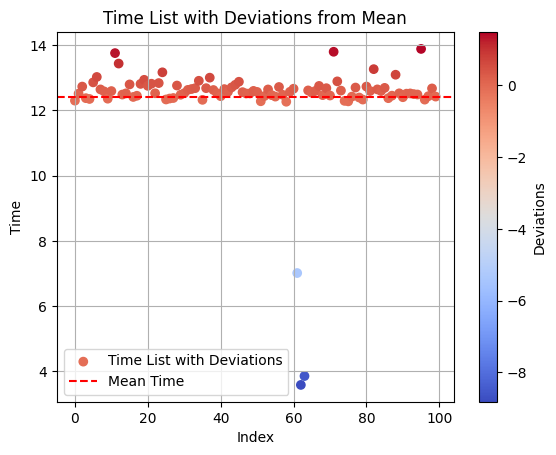

In [50]:
# Calculate deviations from the mean
deviations_iterations = time_list_iterations - time_mean_iterations

# Plot scatter plot with deviations
plt.scatter(range(len(time_list_iterations)), time_list_iterations, c=deviations_iterations, cmap='coolwarm', label='Time List with Deviations')

# Plot horizontal line representing the mean
plt.axhline(y=time_mean_iterations, color='r', linestyle='--', label='Mean Time')

plt.xlabel('Index')
plt.ylabel('Time')
plt.title('Time List with Deviations from Mean')
plt.legend()
plt.colorbar(label='Deviations')
plt.grid(True)
plt.show()

#### Remove outliers and scale

In [54]:
cleaned_values = [x for x in time_list_iterations if x > 8]
time_list_iterations_cleaned = cleaned_values
time_mean_iterations_cleaned = np.mean(time_list_iterations_cleaned)

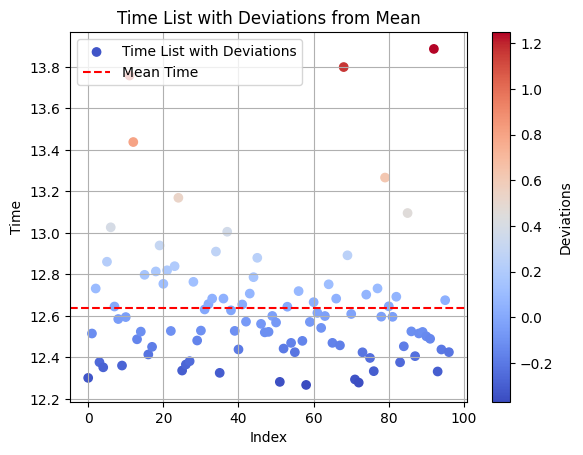

In [56]:
# Calculate deviations from the mean
deviations_iterations_cleaned = time_list_iterations_cleaned - time_mean_iterations_cleaned

# Plot scatter plot with deviations
plt.scatter(range(len(time_list_iterations_cleaned)), time_list_iterations_cleaned, c=deviations_iterations_cleaned, cmap='coolwarm', label='Time List with Deviations')

# Plot horizontal line representing the mean
plt.axhline(y = time_mean_iterations_cleaned, color='r', linestyle='--', label='Mean Time')

plt.xlabel('Index')
plt.ylabel('Time')
plt.title('Time List with Deviations from Mean')
plt.legend()
plt.colorbar(label='Deviations')
plt.grid(True)
plt.show()

In [57]:
# Calculate minimum and maximum values of the array
time_list_iterations_cleaned_min = np.min(time_list_iterations_cleaned)
time_list_iterations_cleaned_max = np.max(time_list_iterations_cleaned)

# Scale the array using Min-Max scaling
time_list_scaled_iterations = (time_list_iterations_cleaned - time_list_iterations_cleaned_min) / (time_list_iterations_cleaned_max - time_list_iterations_cleaned_min)

In [58]:
time_scaled_iterations_mean = np.mean(time_list_scaled_iterations)

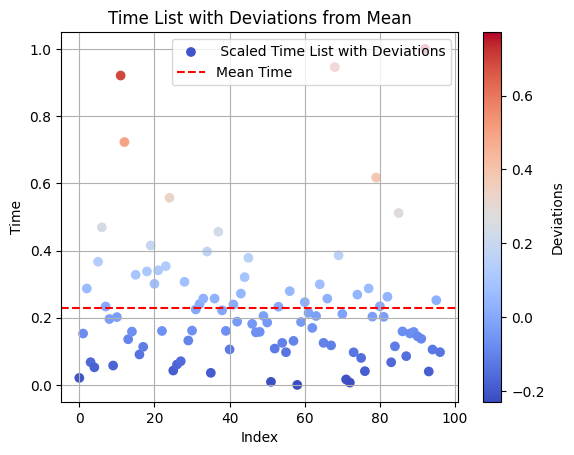

In [59]:
# Calculate deviations from the mean
deviations_scaled = time_list_scaled_iterations - time_scaled_iterations_mean

# Plot scatter plot with deviations
plt.scatter(range(len(time_list_scaled_iterations)), time_list_scaled_iterations, c=deviations_scaled, cmap='coolwarm', label=' Scaled Time List with Deviations')

# Plot horizontal line representing the mean
plt.axhline(y = time_scaled_iterations_mean, color='r', linestyle='--', label='Mean Time')

plt.xlabel('Index')
plt.ylabel('Time')
plt.title('Time List with Deviations from Mean')
plt.legend()
plt.colorbar(label='Deviations')
plt.grid(True)
plt.show()

#### These scaled values will be used later for comparison

<hr>

### Trying different variations in Lattice Size

In [35]:
%%capture

step = 100
rounds = 100
temperature = 1.0
for side in lattice_side:
    time_list = np.zeros(100) # list to store time for different runs
    for i in range(rounds):
        temp_value = LebwohlLasher.main('LebwohlLasher.py',step,lat_size,temperature,0)
        time_list[i]=(return_time(temp_value))
    time_mean = np.mean(time_list)
    original_script = original_script.append({'Time': time_mean, 'MCSteps': step, 'Lattice_Size': side, 'Temperature': temperature, 'Rounds': rounds}, ignore_index=True)

In [37]:
time_list_lattice_size = time_list
time_mean_lattice_size = np.mean(time_list_lattice_size)
time_mean_lattice_size

1.24742556

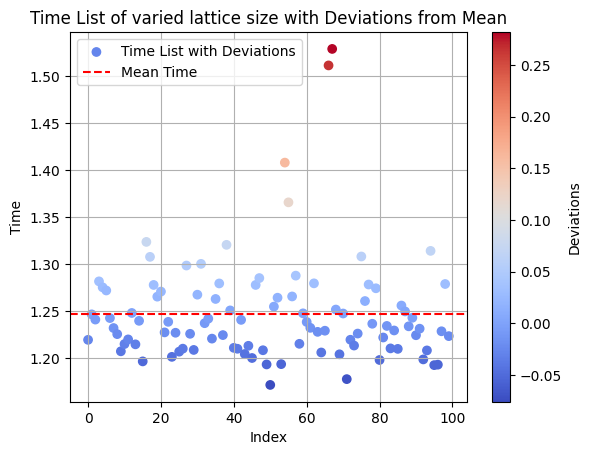

In [40]:
# Calculate deviations from the mean
deviations_lattice_size = time_list_lattice_size - time_mean_lattice_size

# Plot scatter plot with deviations
plt.scatter(range(len(time_list_lattice_size)), time_list_lattice_size, c=deviations_lattice_size, cmap='coolwarm', label='Time List with Deviations')

# Plot horizontal line representing the mean
plt.axhline(y=time_mean_lattice_size, color='r', linestyle='--', label='Mean Time')

plt.xlabel('Index')
plt.ylabel('Time')
plt.title('Time List of varied lattice size with Deviations from Mean')
plt.legend()
plt.colorbar(label='Deviations')
plt.grid(True)
plt.show()

#### Remove outliers

In [44]:
result = [x for x in time_list if x <= 1.35]
time_list_lattice_size_cleaned = result

In [45]:
time_mean_lattice_size_cleaned = np.mean(time_list_lattice_size_cleaned)

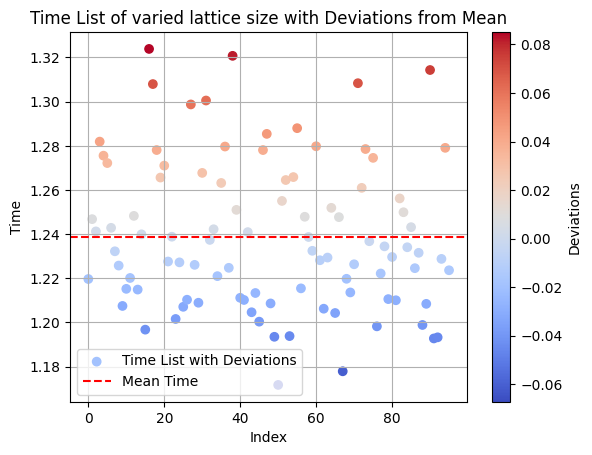

In [46]:
# Calculate deviations from the mean
deviations_lattice_size_cleaned = time_list_lattice_size_cleaned - time_mean_lattice_size_cleaned

# Plot scatter plot with deviations
plt.scatter(range(len(time_list_lattice_size_cleaned)), time_list_lattice_size_cleaned, c=deviations_lattice_size_cleaned, cmap='coolwarm', label='Time List with Deviations')

# Plot horizontal line representing the mean
plt.axhline(y=time_mean_lattice_size_cleaned, color='r', linestyle='--', label='Mean Time')

plt.xlabel('Index')
plt.ylabel('Time')
plt.title('Time List of varied lattice size with Deviations from Mean')
plt.legend()
plt.colorbar(label='Deviations')
plt.grid(True)
plt.show()

### scale

In [87]:
# Calculate minimum and maximum values of the array
time_list_lattice_size_cleaned_min = np.min(time_list_lattice_size_cleaned)
time_list_lattice_size_cleaned_max = np.max(time_list_lattice_size_cleaned)

# Scale the array using Min-Max scaling
time_list_scaled_lattice_size = (time_list_lattice_size_cleaned - time_list_lattice_size_cleaned_min) / (time_list_lattice_size_cleaned_max - time_list_lattice_size_cleaned_min)

In [88]:
time_scaled_lattice_size_mean = np.mean(time_list_scaled_lattice_size)

### plot after scaling

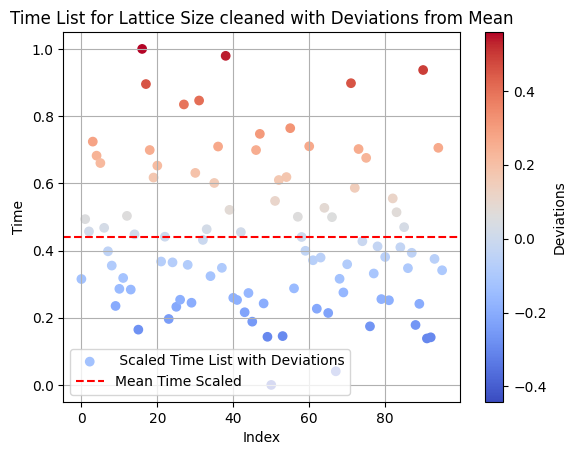

In [89]:
# Calculate deviations from the mean
deviations_lattice_size_scaled = time_list_scaled_lattice_size - time_scaled_lattice_size_mean

# Plot scatter plot with deviations
plt.scatter(range(len(time_list_scaled_lattice_size)), time_list_scaled_lattice_size, c=deviations_lattice_size_scaled, cmap='coolwarm', label=' Scaled Time List with Deviations')

# Plot horizontal line representing the mean
plt.axhline(y = time_scaled_lattice_size_mean, color='r', linestyle='--', label='Mean Time Scaled')

plt.xlabel('Index')
plt.ylabel('Time')
plt.title('Time List for Lattice Size cleaned with Deviations from Mean')
plt.legend()
plt.colorbar(label='Deviations')
plt.grid(True)
plt.show()

<hr>

### Trying different variations in temperatures

In [60]:
%%capture

step = 100
lat_size = 10
rounds = 100
for temp in temperatures:
    time_list = np.zeros(100) # list to store time for different runs
    for i in range(rounds):
        temp_value = LebwohlLasher.main('LebwohlLasher.py',step,lat_size,temp,0)
        time_list[i]=(return_time(temp_value))
    time_mean = np.mean(time_list)
    original_script = original_script.append({'Time': time_mean, 'MCSteps': step, 'Lattice_Size': lat_size, 'Temperature': temp, 'Rounds': rounds}, ignore_index=True)

In [61]:
time_list_temperatures = time_list
time_mean_temperatures = time_mean

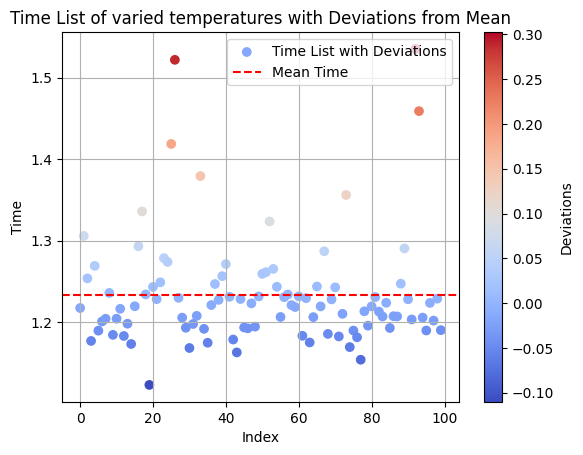

In [65]:
# Calculate deviations from the mean
deviations_temperatures = time_list_temperatures - time_mean_temperatures

# Plot scatter plot with deviations
plt.scatter(range(len(time_list_temperatures)), time_list_temperatures, c=deviations_temperatures, cmap='coolwarm', label='Time List with Deviations')

# Plot horizontal line representing the mean
plt.axhline(y=time_mean_temperatures, color='r', linestyle='--', label='Mean Time')

plt.xlabel('Index')
plt.ylabel('Time')
plt.title('Time List of varied temperatures with Deviations from Mean')
plt.legend()
plt.colorbar(label='Deviations')
plt.grid(True)
plt.show()

#### Remove outliers

In [63]:
result = [x for x in time_list_temperatures if x <= 1.35]
time_list_temperatures_cleaned = result

In [64]:
time_mean_temperatures_cleaned = np.mean(time_list_temperatures_cleaned)

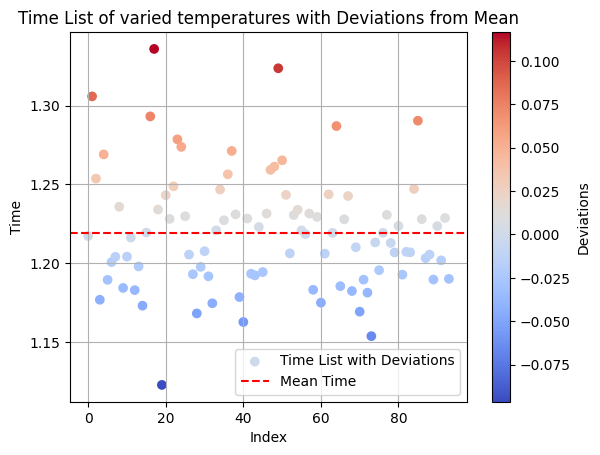

In [67]:
# Calculate deviations from the mean
deviations_temperatures_cleaned = time_list_temperatures_cleaned - time_mean_temperatures_cleaned

# Plot scatter plot with deviations
plt.scatter(range(len(time_list_temperatures_cleaned)), time_list_temperatures_cleaned, c=deviations_temperatures_cleaned, cmap='coolwarm', label='Time List with Deviations')

# Plot horizontal line representing the mean
plt.axhline(y=time_mean_temperatures_cleaned, color='r', linestyle='--', label='Mean Time')

plt.xlabel('Index')
plt.ylabel('Time')
plt.title('Time List of varied temperatures with Deviations from Mean')
plt.legend()
plt.colorbar(label='Deviations')
plt.grid(True)
plt.show()

### Scale

In [90]:
# Calculate minimum and maximum values of the array
time_list_temperatures_cleaned_min = np.min(time_list_temperatures_cleaned)
time_list_temperatures_cleaned_max = np.max(time_list_temperatures_cleaned)

# Scale the array using Min-Max scaling
time_list_scaled_temperatures = (time_list_temperatures_cleaned - time_list_temperatures_cleaned_min) / (time_list_temperatures_cleaned_max - time_list_temperatures_cleaned_min)

In [91]:
time_scaled_temperatures_mean = np.mean(time_list_scaled_temperatures)

# plot after scaling

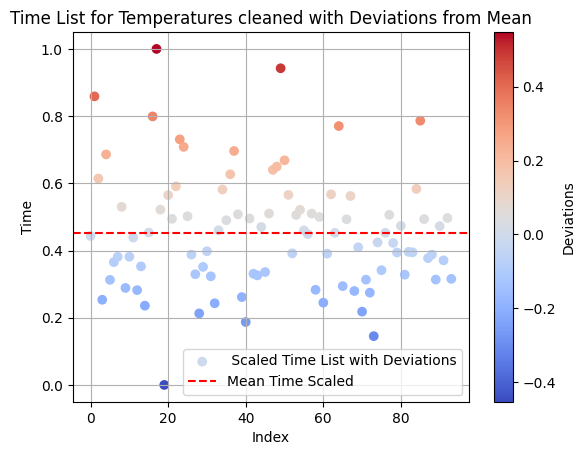

In [92]:
# Calculate deviations from the mean
deviations_temperatures_scaled = time_list_scaled_temperatures - time_scaled_temperatures_mean

# Plot scatter plot with deviations
plt.scatter(range(len(time_list_scaled_temperatures)), time_list_scaled_temperatures, c=deviations_temperatures_scaled, cmap='coolwarm', label=' Scaled Time List with Deviations')

# Plot horizontal line representing the mean
plt.axhline(y = time_scaled_temperatures_mean, color='r', linestyle='--', label='Mean Time Scaled')

plt.xlabel('Index')
plt.ylabel('Time')
plt.title('Time List for Temperatures cleaned with Deviations from Mean')
plt.legend()
plt.colorbar(label='Deviations')
plt.grid(True)
plt.show()

<hr>

### Create a dataframe with results from three runs of time without outliers

In [70]:
print(len(time_list_iterations_cleaned))
print(len(time_list_lattice_size_cleaned))
print(len(time_list_temperatures_cleaned))

97
96
94


In [95]:
padded_lattice_size_cleaned = np.pad(time_list_lattice_size_cleaned, (0, len(time_list_iterations_cleaned) - len(time_list_lattice_size_cleaned)), constant_values=time_mean_lattice_size_cleaned)
padded_temperatures_cleaned = np.pad(time_list_temperatures_cleaned, (0, len(time_list_iterations_cleaned) - len(time_list_temperatures_cleaned)), constant_values=time_mean_temperatures_cleaned)

In [96]:
time_original_variation = pd.DataFrame({
    'MCS_variation': time_list_iterations_cleaned,
    'Lattice_size_variation': padded_lattice_size_cleaned,
    'Temperature_variation': padded_temperatures_cleaned
})

<hr>

### Create csv file for the dataframe for access

In [74]:
time_original_variation.to_csv('time_original_variation.csv', index=False)

<hr>

In [97]:
padded_lattice_size_scaled = np.pad(time_list_scaled_lattice_size, (0, len(time_list_scaled_iterations) - len(time_list_scaled_lattice_size)), constant_values=time_scaled_lattice_size_mean)
padded_temperatures_scaled = np.pad(time_list_scaled_temperatures, (0, len(time_list_scaled_iterations) - len(time_list_scaled_temperatures)), constant_values=time_scaled_temperatures_mean)

In [98]:
time_original_variation_scaled = pd.DataFrame({
    'MCS_variation_scaled': time_list_scaled_iterations,
    'Lattice_size_variation_scaled': padded_lattice_size_scaled,
    'Temperature_variation_scaled': padded_temperatures_scaled
})

#### Create csv file for scaled table

In [101]:
time_original_variation_scaled.to_csv('time_original_variation_scaled.csv', index=False)

<hr>

### Calculate std for each parameter and add to original_script

In [78]:
iterations_std = np.std(time_list_iterations_cleaned)
lattice_size_std = np.std(time_list_lattice_size_cleaned)
temperatures_std = np.std(time_list_temperatures_cleaned)

### add to original script (i have to add it in the row where these variations were biggest as these are the deviations for that)

In [82]:
original_script['Stdeviation'] = [0,0,iterations_std,0,0,0,0,0,lattice_size_std,0,0,0,0,temperatures_std]

### Create csv file for the dataframe of original_script for access

In [83]:
original_script.to_csv('original_script.csv', index=False)

<hr>

### Compare each row of original script to show trends and compare

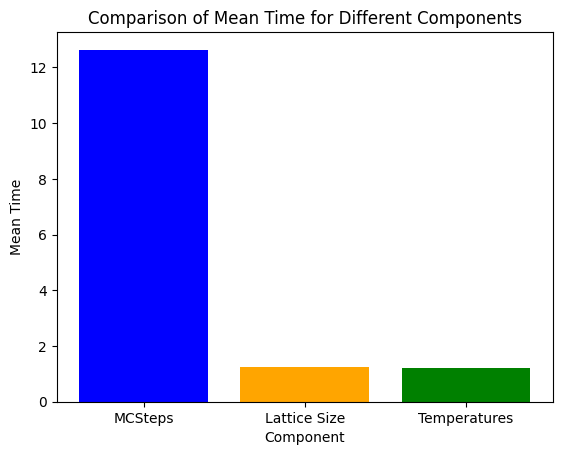

In [85]:
components = ['MCSteps', 'Lattice Size', 'Temperatures']
mean_times = [time_mean_iterations_cleaned, time_mean_lattice_size_cleaned, time_mean_temperatures_cleaned]

plt.bar(components, mean_times, color=['blue', 'orange', 'green'])
plt.xlabel('Component')
plt.ylabel('Mean Time')
plt.title('Comparison of Mean Time for Different Components')
plt.show()

### let us compare after scaling

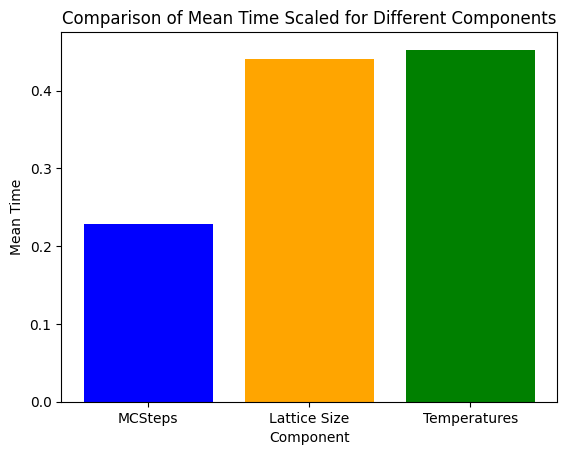

In [93]:
components_scaled = ['MCSteps Scaled', 'Lattice Size Scaled', 'Temperatures Scaled']
mean_times = [time_scaled_iterations_mean, time_scaled_lattice_size_mean, time_scaled_temperatures_mean]

plt.bar(components, mean_times, color=['blue', 'orange', 'green'])
plt.xlabel('Component')
plt.ylabel('Mean Time')
plt.title('Comparison of Mean Time Scaled for Different Components')
plt.show()

### Trends

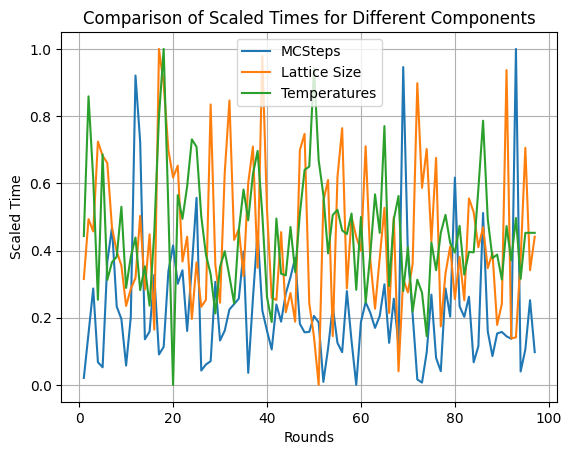

In [113]:
length = range(1, len(time_list_scaled_iterations)+1)

plt.plot(length, time_list_scaled_iterations, label='MCSteps')
plt.plot(length, padded_lattice_size_scaled, label='Lattice Size')
plt.plot(length, padded_temperatures_scaled, label='Temperatures')

plt.xlabel('Rounds')
plt.ylabel('Scaled Time')
plt.title('Comparison of Scaled Times for Different Components')
plt.legend()
plt.grid(True)
plt.show()

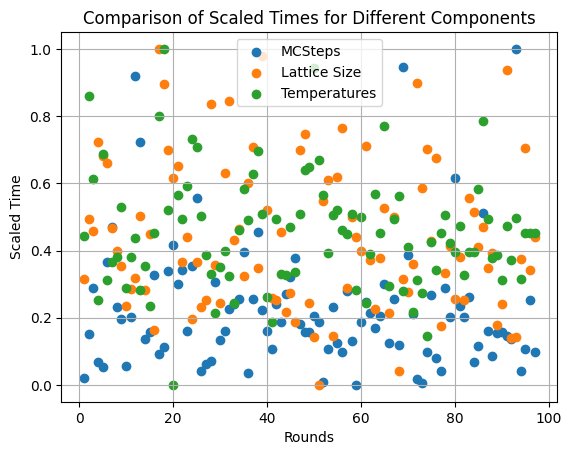

In [114]:
length = range(1, len(time_list_scaled_iterations)+1)

plt.scatter(length, time_list_scaled_iterations, label='MCSteps')
plt.scatter(length, padded_lattice_size_scaled, label='Lattice Size')
plt.scatter(length, padded_temperatures_scaled, label='Temperatures')

plt.xlabel('Rounds')
plt.ylabel('Scaled Time')
plt.title('Comparison of Scaled Times for Different Components')
plt.legend()
plt.grid(True)
plt.show()

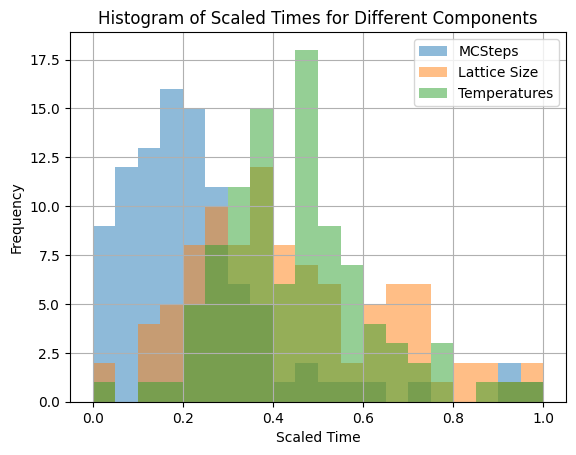

In [110]:
# Plot histograms for each dataset
plt.hist(time_list_scaled_iterations, bins=20, alpha=0.5, label='MCSteps')
plt.hist(padded_lattice_size_scaled, bins=20, alpha=0.5, label='Lattice Size')
plt.hist(padded_temperatures_scaled, bins=20, alpha=0.5, label='Temperatures')

# Add labels and title
plt.xlabel('Scaled Time')
plt.ylabel('Frequency')
plt.title('Histogram of Scaled Times for Different Components')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

### Profile using cProfile the script

In [3]:
import cProfile
import pstats

In [7]:
# let's install tuna to visualise stats
!pip install tuna

   ---------------------------------------- 0.0/149.7 kB ? eta -:--:--
   -- ------------------------------------- 10.2/149.7 kB ? eta -:--:--
   -------- ------------------------------ 30.7/149.7 kB 660.6 kB/s eta 0:00:01
   -------------------------------------- - 143.4/149.7 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 149.7/149.7 kB 1.3 MB/s eta 0:00:00


In [8]:
with cProfile.Profile() as profile:
    LebwohlLasher.main('LebwohlLasher.py',50,50,0.5,0)
results = pstats.Stats(profile)
results.sort_stats(pstats.SortKey.TIME)
results.print_stats()
results.dump_stats("results.prof")

LebwohlLasher.py: Size: 50, Steps: 50, T*: 0.500: Order: 0.288, Time: 3.227999 s
         477040 function calls in 3.264 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   377500    2.043    0.000    2.043    0.000 C:\Users\Kshitij Vashisth\Documents\UoB\Software_scim_0004_assignments\Programming Project 1\LebwohlLasher.py:145(one_energy)
       51    0.739    0.014    0.747    0.015 C:\Users\Kshitij Vashisth\Documents\UoB\Software_scim_0004_assignments\Programming Project 1\LebwohlLasher.py:196(get_order)
       50    0.284    0.006    1.815    0.036 C:\Users\Kshitij Vashisth\Documents\UoB\Software_scim_0004_assignments\Programming Project 1\LebwohlLasher.py:224(MC_step)
    94861    0.140    0.000    0.140    0.000 {method 'uniform' of 'numpy.random.mtrand.RandomState' objects}
       51    0.038    0.001    0.697    0.014 C:\Users\Kshitij Vashisth\Documents\UoB\Software_scim_0004_assignments\Programming Project 1\Lebwohl

### Observations
- We can see that the most cumulative time is taken by one_energy (2.043s) but that is because of the number of calls of this function(377500).
- next is mc_steps which has a cumulative time of 1.815 seconds and individual call the highest 0.036s and number of calls is 50.
- next is get_order which has cumulative time of 0.747 s and individual call of 0.015 s nd 51 calls
- last we have all energy

In [ ]:
os.system('tuna results.prof')

The results obtained from tuna show similar trends

These were obtained before vectorization of MC_step, let's see what happens now. We will run the code first.

In [1]:
import LebwohlLasher

In [2]:
a = LebwohlLasher.main('LebwohlLasher.py',100,10,1.0,0)

LebwohlLasher.py: Size: 10, Steps: 100, T*: 1.000: Order: 0.348, Time: 0.147002 s


This was the previous result:
LebwohlLasher.py: Size: 10, Steps: 100, T*: 1.000: Order: 0.729, Time: 1.234752 s

We can see a significant change just by vectorizing mC-step function

In [4]:
# let's do profiling again
with cProfile.Profile() as profile:
    LebwohlLasher.main('LebwohlLasher.py',50,50,0.5,0)
results = pstats.Stats(profile)
results.sort_stats(pstats.SortKey.TIME)
results.print_stats()
results.dump_stats("results_mcs_vectorized.prof")

LebwohlLasher.py: Size: 50, Steps: 50, T*: 0.500: Order: 0.256, Time: 1.498011 s
         132729 function calls in 1.536 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       51    0.755    0.015    0.763    0.015 C:\Users\Kshitij Vashisth\Documents\UoB\Software_scim_0004_assignments\Programming Project 1\LebwohlLasher.py:196(get_order)
   127600    0.713    0.000    0.713    0.000 C:\Users\Kshitij Vashisth\Documents\UoB\Software_scim_0004_assignments\Programming Project 1\LebwohlLasher.py:145(one_energy)
       51    0.041    0.001    0.720    0.014 C:\Users\Kshitij Vashisth\Documents\UoB\Software_scim_0004_assignments\Programming Project 1\LebwohlLasher.py:179(all_energy)
       50    0.006    0.000    0.049    0.001 C:\Users\Kshitij Vashisth\Documents\UoB\Software_scim_0004_assignments\Programming Project 1\LebwohlLasher.py:275(vectorized_MC_step)
      100    0.003    0.000    0.004    0.000 {method 'randint' of 'numpy

- we can see cumu_time for mcstep has gone down significantly from 1.815 seconds to 0.049 seconds causing the reduction in overall time
- now, the highest cumu_time is for get_order, let's vectorize that

Post get_order vectorization results:

In [6]:
a = LebwohlLasher.main('LebwohlLasher.py',100,10,1.0,0)

LebwohlLasher.py: Size: 10, Steps: 100, T*: 1.000: Order: 0.337, Time: 0.495885 s


In [9]:
# let's do profiling again
with cProfile.Profile() as profile:
    LebwohlLasher.main('LebwohlLasher.py',50,50,0.5,0)
results = pstats.Stats(profile)
results.sort_stats(pstats.SortKey.TIME)
results.print_stats()
results.dump_stats("results_get_order_vectorized.prof")

LebwohlLasher.py: Size: 50, Steps: 50, T*: 0.500: Order: 0.265, Time: 3.814884 s
         135942 function calls in 3.894 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   127600    3.548    0.000    3.548    0.000 C:\Users\Kshitij Vashisth\Documents\UoB\Software_scim_0004_assignments\Programming Project 1\LebwohlLasher.py:145(one_energy)
       51    0.202    0.004    3.589    0.070 C:\Users\Kshitij Vashisth\Documents\UoB\Software_scim_0004_assignments\Programming Project 1\LebwohlLasher.py:179(all_energy)
       51    0.032    0.001    0.068    0.001 C:\Users\Kshitij Vashisth\Documents\UoB\Software_scim_0004_assignments\Programming Project 1\LebwohlLasher.py:229(vectorized_get_order)
       50    0.026    0.001    0.225    0.004 C:\Users\Kshitij Vashisth\Documents\UoB\Software_scim_0004_assignments\Programming Project 1\LebwohlLasher.py:316(vectorized_MC_step)
       50    0.012    0.000    0.012    0.000 {method 'normal'

We can notice an increase in overall time, but get_order time has reduced significantly from 0.763 to 0.068. This is increase in time is caused by one_energy and all energy, maybe because it having to calculate all arrays at once. Let's vectorize all energy, and see what happens.

In [1]:
import os
import LebwohlLasher
import cProfile
import pstats

In [2]:
LebwohlLasher.main('LebwohlLasher.py',100,10,1.0,0)

IndexError: arrays used as indices must be of integer (or boolean) type

I'm unable to vectorize it, so maybe, i'll remove the vectorization for all_energy and get_order to get back to the best speed we got last and try other methods.

In [2]:
a=LebwohlLasher.main('LebwohlLasher.py',100,10,1.0,0)

LebwohlLasher.py: Size: 10, Steps: 100, T*: 1.000: Order: 0.340, Time: 0.698034 s


In [3]:
# let's do profiling again
with cProfile.Profile() as profile:
    LebwohlLasher.main('LebwohlLasher.py',50,50,0.5,0)
results = pstats.Stats(profile)
results.sort_stats(pstats.SortKey.TIME)
results.print_stats()
results.dump_stats("results_mcs_vectorized_1.prof")

LebwohlLasher.py: Size: 50, Steps: 50, T*: 0.500: Order: 0.266, Time: 8.251471 s
         132729 function calls in 8.409 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       51    4.288    0.084    4.316    0.085 C:\Users\Kshitij Vashisth\Documents\UoB\Software_scim_0004_assignments\Programming Project 1\LebwohlLasher.py:224(get_order)
   127600    3.791    0.000    3.791    0.000 C:\Users\Kshitij Vashisth\Documents\UoB\Software_scim_0004_assignments\Programming Project 1\LebwohlLasher.py:146(one_energy)
       51    0.220    0.004    3.840    0.075 C:\Users\Kshitij Vashisth\Documents\UoB\Software_scim_0004_assignments\Programming Project 1\LebwohlLasher.py:181(all_energy)
       50    0.027    0.001    0.239    0.005 C:\Users\Kshitij Vashisth\Documents\UoB\Software_scim_0004_assignments\Programming Project 1\LebwohlLasher.py:346(vectorized_MC_step)
       50    0.014    0.000    0.014    0.000 {method 'normal' of 'numpy.

Maybe the unused code is causing issues with speed. let's remove and try again

In [6]:
a=LebwohlLasher.main('LebwohlLasher.py',100,10,1.0,0)

LebwohlLasher.py: Size: 10, Steps: 100, T*: 1.000: Order: 0.422, Time: 0.141999 s


that was just my laptop running on the performance mode before, let's bring the unused code back.

In [2]:
LebwohlLasher.main('LebwohlLasher.py',100,10,1.0,0)

LebwohlLasher.py: Size: 10, Steps: 100, T*: 1.000: Order: 0.312, Time: 0.148999 s


'LebwohlLasher.py: Size: 10, Steps: 100, T*: 1.000: Order: 0.312, Time: 0.148999 s'

In [3]:
# let's do profiling again
with cProfile.Profile() as profile:
    LebwohlLasher.main('LebwohlLasher.py',50,50,0.5,0)
results = pstats.Stats(profile)
results.sort_stats(pstats.SortKey.TIME)
results.print_stats()
results.dump_stats("results_mcs_vectorized_1.prof")

LebwohlLasher.py: Size: 50, Steps: 50, T*: 0.500: Order: 0.264, Time: 1.477003 s
         132729 function calls in 1.517 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       51    0.753    0.015    0.760    0.015 C:\Users\Kshitij Vashisth\Documents\UoB\Software_scim_0004_assignments\Programming Project 1\LebwohlLasher.py:224(get_order)
   127600    0.698    0.000    0.698    0.000 C:\Users\Kshitij Vashisth\Documents\UoB\Software_scim_0004_assignments\Programming Project 1\LebwohlLasher.py:146(one_energy)
       51    0.040    0.001    0.703    0.014 C:\Users\Kshitij Vashisth\Documents\UoB\Software_scim_0004_assignments\Programming Project 1\LebwohlLasher.py:181(all_energy)
       50    0.006    0.000    0.049    0.001 C:\Users\Kshitij Vashisth\Documents\UoB\Software_scim_0004_assignments\Programming Project 1\LebwohlLasher.py:346(vectorized_MC_step)
       50    0.003    0.000    0.003    0.000 {method 'normal' of 'numpy.

In [3]:
# let's do profiling again for vectorized get_order
with cProfile.Profile() as profile:
    LebwohlLasher.main('LebwohlLasher.py',50,50,0.5,0)
results = pstats.Stats(profile)
results.sort_stats(pstats.SortKey.TIME)
results.print_stats()
results.dump_stats("results_mcs_vectorized_get_order.prof")

LebwohlLasher.py: Size: 50, Steps: 50, T*: 0.500: Order: 0.255, Time: 0.732019 s
         135942 function calls in 0.750 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   127600    0.683    0.000    0.683    0.000 C:\Users\Kshitij Vashisth\Documents\UoB\Software_scim_0004_assignments\Programming Project 1\LebwohlLasher.py:146(one_energy)
       51    0.038    0.001    0.689    0.014 C:\Users\Kshitij Vashisth\Documents\UoB\Software_scim_0004_assignments\Programming Project 1\LebwohlLasher.py:181(all_energy)
       51    0.006    0.000    0.013    0.000 C:\Users\Kshitij Vashisth\Documents\UoB\Software_scim_0004_assignments\Programming Project 1\LebwohlLasher.py:259(vectorized_get_order)
       50    0.005    0.000    0.045    0.001 C:\Users\Kshitij Vashisth\Documents\UoB\Software_scim_0004_assignments\Programming Project 1\LebwohlLasher.py:346(vectorized_MC_step)
       50    0.002    0.000    0.002    0.000 {method 'normal'

In [4]:
LebwohlLasher.main('LebwohlLasher.py',100,10,1.0,0)

LebwohlLasher.py: Size: 10, Steps: 100, T*: 1.000: Order: 0.332, Time: 0.100002 s


'LebwohlLasher.py: Size: 10, Steps: 100, T*: 1.000: Order: 0.332, Time: 0.100002 s'

Get_order vectorized also works so that's good.

In [ ]:
# let's work on mpi4py next